In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Q1)

In [2]:
n, m = 10, 100
np.random.seed(1)
Z = np.random.normal(0,1,(m,n))
B = np.random.normal(0, 1, m)


In [3]:
def gradiantDescent(x0, eta):
    x = x0
    T = 40000
    cost = []
    for i in range(T):
        loss = np.abs(Z@x - B).sum()/m 
        gradiant = np.zeros(n)    
        for j in range(m):
            if Z[j,:]@x-B[j] >0:
                gradiant += Z[j,:]
            else:
                gradiant -= Z[j,:]
        gradiant /= m
        x -= eta*gradiant
        cost.append(loss)

    return cost
        
            

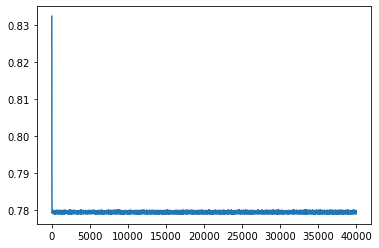

In [4]:
cost1 = gradiantDescent(np.zeros(n), .1)
plt.plot(range(40000), cost1)


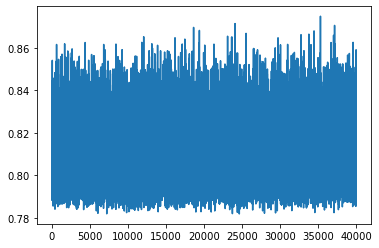

In [5]:
cost2 = gradiantDescent(np.zeros(n), 1)
plt.plot(range(40000), cost2)


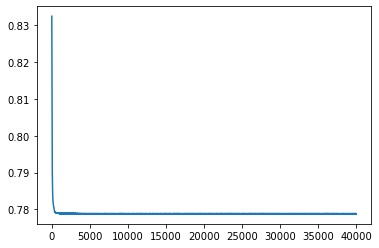

In [6]:
cost3 = gradiantDescent(np.zeros(n), .01)
plt.plot(range(40000), cost3)


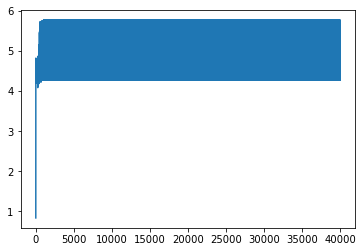

In [7]:
cost4 = gradiantDescent(np.zeros(n), 10)
plt.plot(range(40000), cost4)


## Q2)

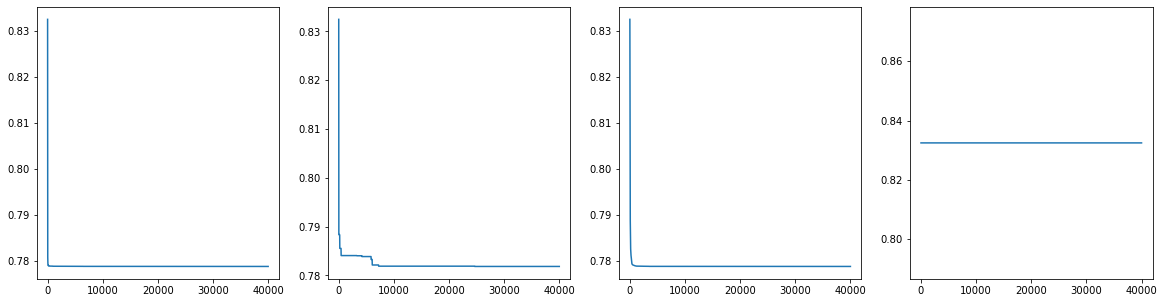

In [8]:

f, a = plt.subplots(1, 4, figsize=(20,5))
costs = [cost1, cost2, cost3, cost4]
for e in range(4):
    minls = []
    for i in range(len(costs[e])):
        minls.append(min(costs[e][:i+1]))

    a[e].plot(range(40000), minls)


# Q3)

In [9]:
def stochasticGradiantDescent(x0, eta):
    x = x0
    T = 40000
    cost = []
    for i in range(T):
        loss = np.abs(Z@x - B).sum()/m 
        gradiant = np.zeros(n)    
        for j in range(m):
            if Z[j,:]@x-B[j] >0:
                gradiant += Z[j,:]
            else:
                gradiant -= Z[j,:]
        gradiant /= m
        gradiant += (np.random.rand(n)*2-1) * np.linalg.norm(gradiant) * .1
        x -= eta*gradiant
        cost.append(loss)

    return cost
        
            

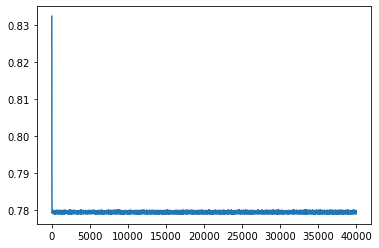

In [10]:
st_cost1 = stochasticGradiantDescent(np.zeros(n), .01)
plt.plot(range(40000), cost1)

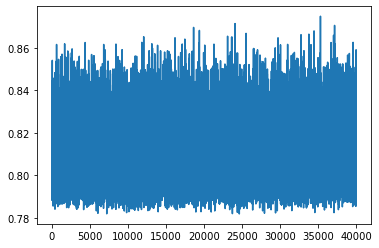

In [11]:
st_cost2 = stochasticGradiantDescent(np.zeros(n), .1)
plt.plot(range(40000), cost2)

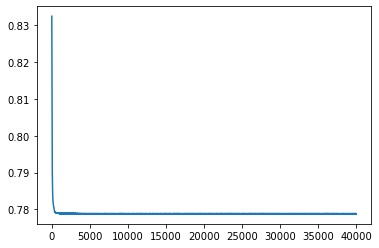

In [12]:
st_cost3 = stochasticGradiantDescent(np.zeros(n), 1)
plt.plot(range(40000), cost3)

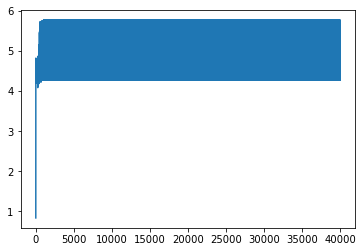

In [13]:
st_cost4 = stochasticGradiantDescent(np.zeros(n), 10)
plt.plot(range(40000), cost4)

نتیجه می‌شود که حتی با طول قدم زیاد هم قسمت تصادفی باعث می‌شود با تعداد قدم زیاد به نقطه‌ی بهینه میل کنیم.

## Q4)

In [14]:
import time

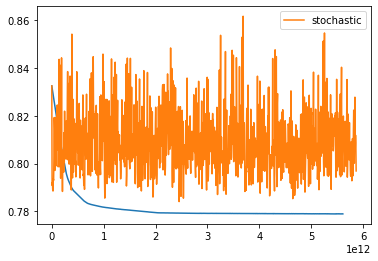

In [15]:
t1 = time.time_ns()
cost1 = gradiantDescent(np.zeros(n), .01)
t1 = time.time_ns() - t1

t2 = time.time_ns()
st_cost1 = stochasticGradiantDescent(np.zeros(n), .01)
t2 = time.time_ns() - t2

plt.plot(np.arange(1000) * t1, cost1[:1000])
plt.plot(np.arange(1000) * t2, cost2[:1000], label='stochastic')
plt.legend()

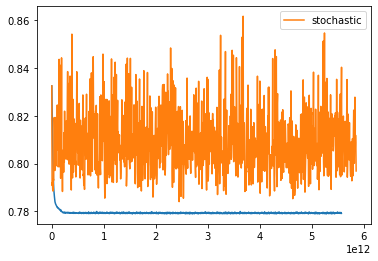

In [16]:
t1 = time.time_ns()
cost1 = gradiantDescent(np.zeros(n), .1)
t1 = time.time_ns() - t1

t2 = time.time_ns()
st_cost1 = stochasticGradiantDescent(np.zeros(n), .1)
t2 = time.time_ns() - t2

plt.plot(np.arange(1000) * t1, cost1[:1000])
plt.plot(np.arange(1000) * t2, cost2[:1000], label='stochastic')
plt.legend()

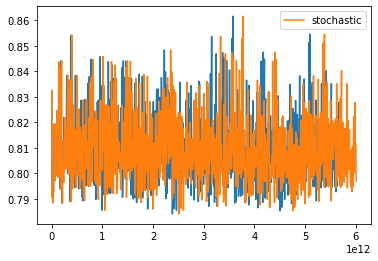

In [17]:
t1 = time.time_ns()
cost1 = gradiantDescent(np.zeros(n), 1)
t1 = time.time_ns() - t1

t2 = time.time_ns()
st_cost1 = stochasticGradiantDescent(np.zeros(n), 1)
t2 = time.time_ns() - t2

plt.plot(np.arange(1000) * t1, cost1[:1000])
plt.plot(np.arange(1000) * t2, cost2[:1000], label='stochastic')
plt.legend()

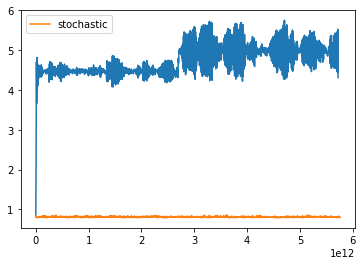

In [18]:
t1 = time.time_ns()
cost1 = gradiantDescent(np.zeros(n), 10)
t1 = time.time_ns() - t1

t2 = time.time_ns()
st_cost1 = stochasticGradiantDescent(np.zeros(n), 10)
t2 = time.time_ns() - t2

plt.plot(np.arange(1000) * t1, cost1[:1000])
plt.plot(np.arange(1000) * t2, cost2[:1000], label='stochastic')
plt.legend()

## Q5)

In [19]:
import pandas

In [20]:
dataframe = pandas.read_csv('house_data.csv')

In [21]:
dataframe.head()

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
0,152,1,3,3,0,0,0,0,1,981653.9936
1,142,1,2,23,0,0,1,0,0,870284.3499
2,64,1,2,26,0,0,0,0,1,515868.5989
3,156,2,3,37,0,0,0,0,1,979655.8731
4,121,4,2,24,0,0,1,0,0,859453.6265


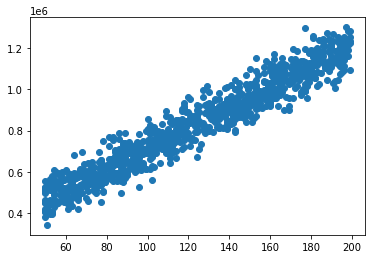

In [22]:
plt.scatter(dataframe['size'], dataframe.price)

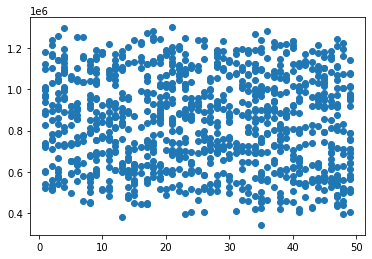

In [23]:
plt.scatter(dataframe.age, dataframe.price)

In [24]:
mean1 = dataframe.where(dataframe.bedrooms == 1)['size'].mean()
mean2 = dataframe.where(dataframe.bedrooms == 2)['size'].mean()
mean3 = dataframe.where(dataframe.bedrooms == 3)['size'].mean()
mean4 = dataframe.where(dataframe.bedrooms == 4)['size'].mean()
mean5 = dataframe.where(dataframe.bedrooms == 5)['size'].mean()


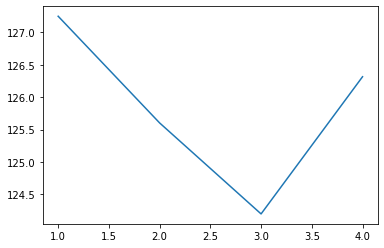

In [25]:
plt.plot([1,2,3,4,5], [mean1, mean2, mean3, mean4, mean5])

همانطور که از نمودارها پیداست رابطه خطی بین متراز خانه و قیمت وجود دارد. اما سن ساختمان و قیمت رابطه‌ای بین با هم ندارند. از طرفی بین متراز خانه و تعداد اتاقها تا ۳ اتاق رابطه‌ی خطی و نزولی وحود دارد. در واقع هر چه تعداد اتاقها بیشتر مساحت خانه کمتر ولی در خانه با ۴ اتاق خواب این رابطه‌ی خطی به صورت صعودی می‌شود و مساحت نسبت به ۳ اتاق بیشتر است.

## Q6)

In [26]:
train_size = (dataframe.__len__() // 3) * 2
test_size = dataframe.__len__() - train_size


In [27]:
trainData = dataframe.iloc[range(train_size)]
testData = dataframe.iloc[range(train_size, train_size + test_size)]

In [28]:
mean = trainData.mean()
std = trainData.std()

In [29]:
trainData -= mean
testData -= mean

In [30]:
trainData /= std
testData /= std

In [31]:
trainData.head()

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
0,0.565367,-1.294139,1.312798,-1.594851,-0.513187,-0.494461,-0.487402,-0.522506,2.078822,0.607373
1,0.337427,-1.294139,0.074379,-0.205212,-0.513187,-0.494461,2.048613,-0.522506,-0.480319,0.110404
2,-1.440507,-1.294139,0.074379,0.003234,-0.513187,-0.494461,-0.487402,-0.522506,2.078822,-1.471120
3,0.656543,-0.393516,1.312798,0.767536,-0.513187,-0.494461,-0.487402,-0.522506,2.078822,0.598457
4,-0.141248,1.407731,0.074379,-0.135730,-0.513187,-0.494461,2.048613,-0.522506,-0.480319,0.062074


## Q7)

In [32]:
def lossFunction(prediction, true_value):
    return np.sum((prediction - true_value)**2) / prediction.shape[0]

## Q8)

In [33]:
def sgd(w, b, batch, eta):
    error = batch['X'] @ w + b - batch['Y']
    error /= batch['n']

    wGradiant = batch['X'].T @ error
    bGradiant = error.sum()

    return w - eta * wGradiant, b - eta * bGradiant



## Q9)

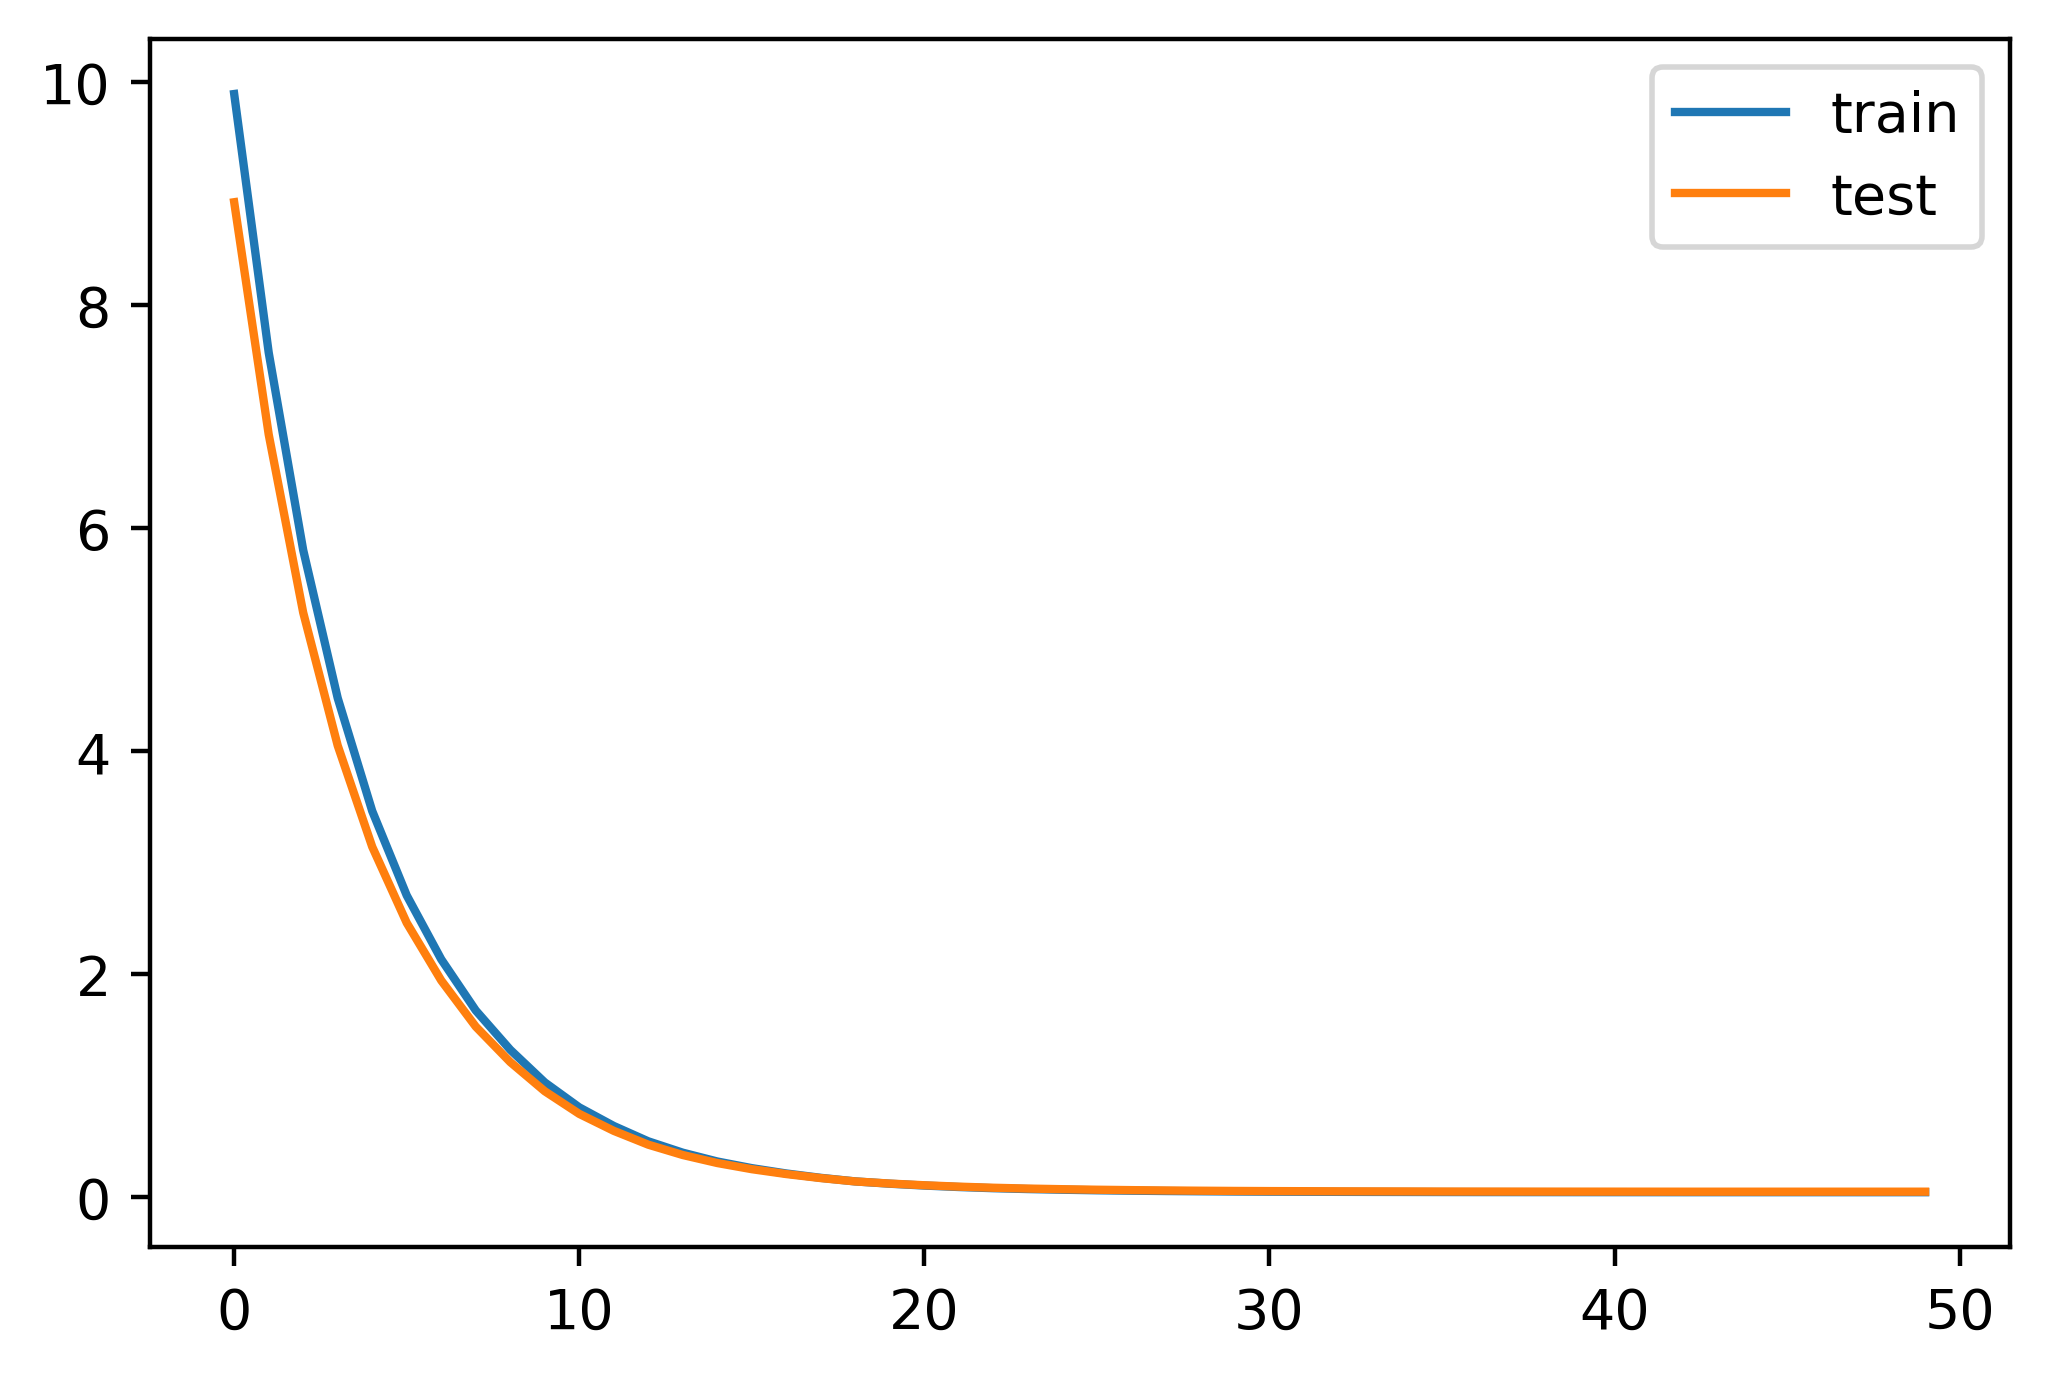

In [39]:
numberOfEpochs = 50

batchSize = 60

w = np.random.normal(0,1,trainData.values.shape[1]-1)
b = 0


test = testData.values
testX = test[:,:-1]
testy = test[:,-1]

def eta(bNumber, epoch):
    return .01

trainLosses = []
testLosses = []
for epoch in range(numberOfEpochs):
    data = trainData.values
    np.random.shuffle(data)
    X = data[:,:-1]
    y = data[:,-1]

    numberOfBatches = int(np.ceil(data.shape[0] / batchSize))

    for bNumber in range(batchSize):
        l = bNumber * batchSize
        r = min(l + batchSize, data.shape[0])
        batch = {}
        batch['X'] = X[l:r]
        batch['Y'] = y[l:r]
        batch['n'] = r - l

        w, b = sgd(w, b, batch, eta(bNumber, epoch))

    trainLosses += [lossFunction(X @ w + b, y)]
    testLosses += [lossFunction(testX@w + b, testy)]



plt.figure(dpi=400)
plt.plot(range(numberOfEpochs), trainLosses, label='train')
plt.plot(range(numberOfEpochs), testLosses, label='test')

plt.legend()
plt.savefig('training.png')
        